### Real data

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
url = "https://data.london.gov.uk/download/animal-rescue-incidents-attended-by-lfb/01007433-55c2-4b8a-b799-626d9e3bc284/Animal%20Rescue%20incidents%20attended%20by%20LFB%20from%20Jan%202009.csv.xlsx"

In [24]:
df = pd.read_excel(url)

In [27]:
df.dtypes

IncidentNumber                        object
DateTimeOfCall                datetime64[ns]
CalYear                                int64
FinYear                               object
TypeOfIncident                        object
PumpCount                            float64
PumpHoursTotal                       float64
HourlyNotionalCost(£)                  int64
IncidentNotionalCost(£)              float64
FinalDescription                      object
AnimalGroupParent                     object
OriginofCall                          object
PropertyType                          object
PropertyCategory                      object
SpecialServiceTypeCategory            object
SpecialServiceType                    object
WardCode                              object
Ward                                  object
BoroughCode                           object
Borough                               object
StnGroundName                         object
UPRN                                 float64
Street    

In [28]:
df.DateTimeOfCall

0       2009-01-01 03:01:00
1       2009-01-01 08:51:00
2       2009-01-04 10:07:00
3       2009-01-05 12:27:00
4       2009-01-06 15:23:00
                ...        
11653   2024-12-29 11:34:00
11654   2024-12-29 13:46:00
11655   2024-12-30 10:53:00
11656   2024-12-30 15:44:00
11657   2024-12-31 17:37:00
Name: DateTimeOfCall, Length: 11658, dtype: datetime64[ns]

<Axes: >

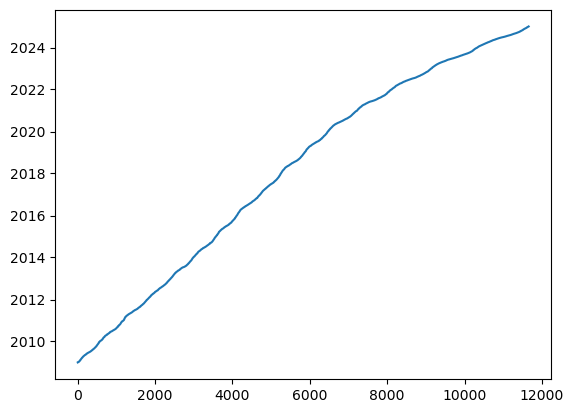

In [29]:
df.DateTimeOfCall.plot()

In [30]:
df.head()

,IncidentNumber,DateTimeOfCall,CalYear,FinYear,TypeOfIncident,PumpCount,PumpHoursTotal,HourlyNotionalCost(£),IncidentNotionalCost(£),FinalDescription,...,UPRN,Street,USRN,PostcodeDistrict,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude
0,139091,2009-01-01 03:01:00,2009,2008/09,Special Service,1.0,2.0,255,510.0,Redacted,...,NaN,Waddington Way,20500146.0,SE19,NaN,NaN,532350,170050,NaN,NaN
1,275091,2009-01-01 08:51:00,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,...,NaN,Grasmere Road,NaN,SE25,534785.0,167546.0,534750,167550,51.390954,-0.064167
2,2075091,2009-01-04 10:07:00,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,...,NaN,Mill Lane,NaN,SM5,528041.0,164923.0,528050,164950,51.368941,-0.161985
3,2872091,2009-01-05 12:27:00,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,...,1.000215e+11,Park Lane,21401484.0,UB9,504689.0,190685.0,504650,190650,51.605283,-0.489684
4,3553091,2009-01-06 15:23:00,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,...,NaN,Swindon Lane,21300122.0,RM3,NaN,NaN,554650,192350,NaN,NaN


In [32]:
df.set_index("DateTimeOfCall", inplace=True)

In [34]:
df.loc["2022-01-01":"2022-01-31","FinalDescription"]

DateTimeOfCall
2022-01-01 10:26:00    ASSIST RSPCA WITH CAT UP TREE   RSPCA ON SCENE...
2022-01-01 12:36:00                                             Redacted
2022-01-01 14:06:00                CAT IN TREE    COLLAR STUCK ON BRANCH
2022-01-01 17:12:00                                  CAT TRAPPED IN TREE
2022-01-01 18:57:00                                             Redacted
                                             ...                        
2022-01-29 21:20:00    BABY BIRDS TRAPPED BEHIND NETTING    - LONDON ...
2022-01-30 18:10:00                                             Redacted
2022-01-30 20:53:00    CAT STUCK IN CAR ENGINE BAY    CALLER TO MEET ...
2022-01-31 07:48:00                CAT WITH HEAD STUCK IN SKIRTING BOARD
2022-01-31 20:24:00                        CAT TRAPPED UNDER FLOORBOARDS
Name: FinalDescription, Length: 61, dtype: object

In [36]:
df.resample("ME").CalYear.count()

DateTimeOfCall
2009-01-31     55
2009-02-28     27
2009-03-31     43
2009-04-30     41
2009-05-31     59
             ... 
2024-08-31    145
2024-09-30    109
2024-10-31     89
2024-11-30     75
2024-12-31     76
Freq: ME, Name: CalYear, Length: 192, dtype: int64

<Axes: xlabel='DateTimeOfCall'>

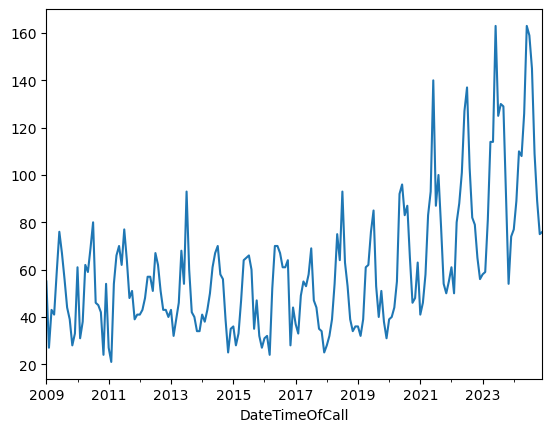

In [37]:
df.resample("ME").CalYear.count().plot()

[]

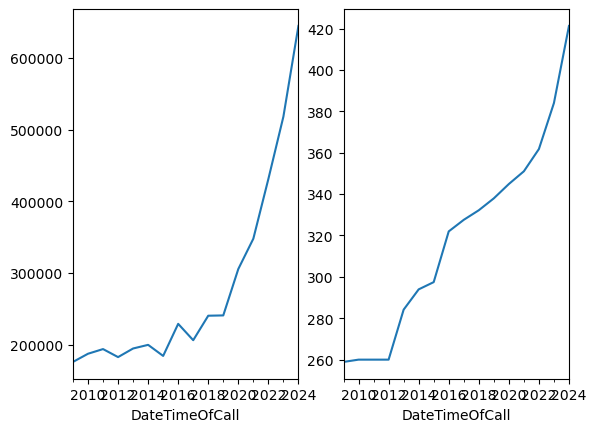

In [43]:
fig, axs = plt.subplots(ncols=2)
df.resample("YE")["IncidentNotionalCost(£)"].sum().plot(ax=axs[0])
df.resample("YE")["HourlyNotionalCost(£)"].mean().plot(ax=axs[1])
plt.plot()

In [39]:
df.columns

Index(['IncidentNumber', 'CalYear', 'FinYear', 'TypeOfIncident', 'PumpCount',
       'PumpHoursTotal', 'HourlyNotionalCost(£)', 'IncidentNotionalCost(£)',
       'FinalDescription', 'AnimalGroupParent', 'OriginofCall', 'PropertyType',
       'PropertyCategory', 'SpecialServiceTypeCategory', 'SpecialServiceType',
       'WardCode', 'Ward', 'BoroughCode', 'Borough', 'StnGroundName', 'UPRN',
       'Street', 'USRN', 'PostcodeDistrict', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude'],
      dtype='object')

In [45]:
df.isna().sum()

IncidentNumber                   0
CalYear                          0
FinYear                          0
TypeOfIncident                   0
PumpCount                       77
PumpHoursTotal                  79
HourlyNotionalCost(£)            0
IncidentNotionalCost(£)         79
FinalDescription                 5
AnimalGroupParent                0
OriginofCall                     0
PropertyType                     0
PropertyCategory                 0
SpecialServiceTypeCategory       0
SpecialServiceType               0
WardCode                        19
Ward                            19
BoroughCode                     14
Borough                         14
StnGroundName                    0
UPRN                          7265
Street                           0
USRN                          1156
PostcodeDistrict                 0
Easting_m                     6246
Northing_m                    6246
Easting_rounded                  0
Northing_rounded                 0
Latitude            

In [50]:
missing = (df.PumpCount.isna() | df.PumpHoursTotal.isna())

In [53]:
df1 = df.drop(df.loc[missing].index)

In [54]:
df2 = df.dropna(subset=["PumpCount", "PumpHoursTotal"])

In [55]:
len(df1)

11579

In [56]:
len(df2)

11579

In [57]:
len(df)

11658

<Axes: >

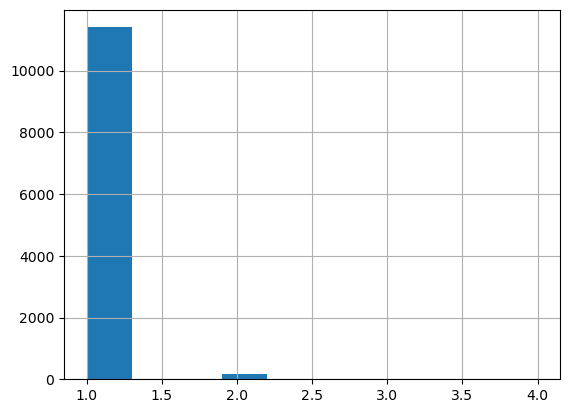

In [58]:
df.PumpCount.hist()

<Axes: >

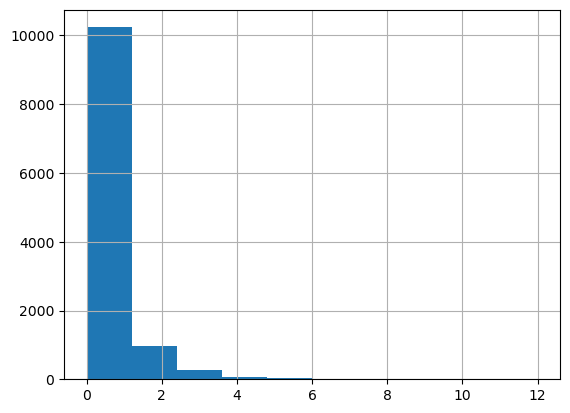

In [59]:
df.PumpHoursTotal.hist()

In [60]:
df.fillna({"PumpCount": 1, "PumpHoursTotal": 1}, inplace=True)

In [62]:
df.isna().sum()

IncidentNumber                   0
CalYear                          0
FinYear                          0
TypeOfIncident                   0
PumpCount                        0
PumpHoursTotal                   0
HourlyNotionalCost(£)            0
IncidentNotionalCost(£)         79
FinalDescription                 5
AnimalGroupParent                0
OriginofCall                     0
PropertyType                     0
PropertyCategory                 0
SpecialServiceTypeCategory       0
SpecialServiceType               0
WardCode                        19
Ward                            19
BoroughCode                     14
Borough                         14
StnGroundName                    0
UPRN                          7265
Street                           0
USRN                          1156
PostcodeDistrict                 0
Easting_m                     6246
Northing_m                    6246
Easting_rounded                  0
Northing_rounded                 0
Latitude            

In [64]:
df.nunique().sort_values()

TypeOfIncident                    1
PumpCount                         4
SpecialServiceTypeCategory        4
PropertyCategory                  7
OriginofCall                      8
PumpHoursTotal                   12
HourlyNotionalCost(£)            14
CalYear                          16
FinYear                          17
SpecialServiceType               24
AnimalGroupParent                29
BoroughCode                      37
Borough                          70
IncidentNotionalCost(£)          90
StnGroundName                   109
PropertyType                    194
PostcodeDistrict                283
Northing_rounded                428
Easting_rounded                 533
WardCode                        762
Ward                           1371
UPRN                           4184
Northing_m                     4848
Easting_m                      4949
Latitude                       5341
Longitude                      5341
FinalDescription               7054
USRN                        